In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Train.csv to Train.csv
User uploaded file "Train.csv" with length 2659324 bytes


In [ ]:
df=pd.read_csv('Train.csv')

In [ ]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
print('Columns names:\n',df.columns)

Columns names:
 Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')


In [ ]:
print("\n\nData Types :\n", df.dtypes)



Data Types :
 date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object


In [ ]:
print("\n Total empty cells by column :\n", df.isnull().sum(), "\n\n")


 Total empty cells by column :
 date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64 




In [ ]:
df[['date','Time']]=df.date_time.str.split(expand=True)

In [ ]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,Time
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00


In [ ]:
df['Journey_Day'] = pd.to_datetime(df.date, format='%Y/%m/%d').dt.day

In [ ]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,Time,Journey_Day
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00,2
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00,2
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00,2
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00,2
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00,2


In [ ]:
df['Journey_Month'] = pd.to_datetime(df.date_time, format='%Y/%m/%d').dt.month
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,Time,Journey_Day,Journey_Month
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00,2,10
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00,2,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00,2,10
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00,2,10
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00,2,10


In [ ]:
df['date'] = pd.to_datetime(df['date_time'], errors='coerce')
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,Time,Journey_Day,Journey_Month,weekday
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02 09:00:00,09:00:00,2,10,1
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02 10:00:00,10:00:00,2,10,1
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02 11:00:00,11:00:00,2,10,1
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02 12:00:00,12:00:00,2,10,1
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02 13:00:00,13:00:00,2,10,1


In [ ]:
df['weekday'] = df.date.dt.weekday

In [ ]:
df.tail(25)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,Time,Journey_Day,Journey_Month,weekday
33725,2017-05-17 13:00:00,None,96,68,1,315,6,6,292.09,0.0,0.0,90,Rain,proximity shower rain,4789,2017-05-17 13:00:00,13:00:00,17,5,2
33726,2017-05-17 13:00:00,None,236,68,3,341,1,1,292.09,0.0,0.0,90,Drizzle,light intensity drizzle,4789,2017-05-17 13:00:00,13:00:00,17,5,2
33727,2017-05-17 14:00:00,None,120,68,3,341,1,1,292.62,0.0,0.0,90,Rain,proximity shower rain,5185,2017-05-17 14:00:00,14:00:00,17,5,2
33728,2017-05-17 15:00:00,None,148,62,2,335,7,7,293.15,0.0,0.0,40,Rain,proximity shower rain,5590,2017-05-17 15:00:00,15:00:00,17,5,2
33729,2017-05-17 16:00:00,None,244,62,1,318,5,5,292.75,0.0,0.0,90,Rain,moderate rain,6426,2017-05-17 16:00:00,16:00:00,17,5,2
33730,2017-05-17 16:00:00,None,271,62,1,333,6,6,292.75,0.0,0.0,90,Mist,mist,6426,2017-05-17 16:00:00,16:00:00,17,5,2
33731,2017-05-17 17:00:00,None,218,59,2,334,6,6,292.09,0.0,0.0,90,Rain,moderate rain,5763,2017-05-17 17:00:00,17:00:00,17,5,2
33732,2017-05-17 17:00:00,None,237,62,2,334,4,4,292.09,0.0,0.0,90,Mist,mist,5763,2017-05-17 17:00:00,17:00:00,17,5,2
33733,2017-05-17 18:00:00,None,194,69,2,334,2,2,291.35,0.0,0.0,90,Rain,moderate rain,4864,2017-05-17 18:00:00,18:00:00,17,5,2
33734,2017-05-17 18:00:00,None,91,67,2,337,8,8,291.35,0.0,0.0,90,Mist,mist,4864,2017-05-17 18:00:00,18:00:00,17,5,2


In [ ]:
df.drop(['date'],axis=1,inplace=True)

In [ ]:
df.drop(['date_time'],axis=1,inplace=True)

In [ ]:
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Time,Journey_Day,Journey_Month,weekday
0,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,2,10,1
1,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,2,10,1
2,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,2,10,1
3,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,2,10,1
4,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,2,10,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['is_holiday']=le.fit_transform(df['is_holiday'])

In [ ]:
df['weather_description']=le.fit_transform(df['weather_description'])

In [ ]:
df['weather_type']=le.fit_transform(df['weather_type'])

In [ ]:
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Time,Journey_Day,Journey_Month,weekday
0,7,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,09:00:00,2,10,1
1,7,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10:00:00,2,10,1
2,7,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,11:00:00,2,10,1
3,7,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,12:00:00,2,10,1
4,7,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,13:00:00,2,10,1


In [ ]:
print("\n\nData Types :\n", df.dtypes)



Data Types :
 is_holiday               int64
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type             int64
weather_description      int64
traffic_volume           int64
Time                    object
Journey_Day              int64
Journey_Month            int64
weekday                  int64
dtype: object


In [ ]:
df['Time'] = df['Time'].apply(lambda x: x[0:2])
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Time,Journey_Day,Journey_Month,weekday
0,7,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,09,2,10,1
1,7,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10,2,10,1
2,7,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,11,2,10,1
3,7,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,12,2,10,1
4,7,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,13,2,10,1


In [ ]:
print("\n\nData Types :\n", df.dtypes)



Data Types :
 is_holiday               int64
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type             int64
weather_description      int64
traffic_volume           int64
Time                    object
Journey_Day              int64
Journey_Month            int64
weekday                  int64
dtype: object


In [ ]:
df['Time']=df['Time'].astype(int)
df.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Time,Journey_Day,Journey_Month,weekday
0,7,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,9,2,10,1
1,7,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10,2,10,1
2,7,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,11,2,10,1
3,7,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,12,2,10,1
4,7,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,13,2,10,1


In [ ]:
df.corr()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Time,Journey_Day,Journey_Month,weekday
is_holiday,1.000000,-0.003300,0.006598,-0.003104,0.001052,-0.009458,-0.009458,-0.000378,0.000066,0.000464,0.004567,-0.005211,-0.000496,0.016844,0.023377,0.004952,-0.012406,0.017276
air_pollution_index,-0.003300,1.000000,-0.000277,-0.004166,0.000749,0.003499,0.003499,0.005368,0.000443,0.007227,-0.008541,-0.004624,-0.004331,-0.003751,0.000424,0.010109,0.007733,0.004411
humidity,0.006598,-0.000277,1.000000,-0.147042,-0.046268,0.005510,0.005510,0.033273,-0.012161,0.016625,0.014520,0.033865,-0.015151,0.016455,0.001066,0.064877,0.169736,-0.011583
wind_speed,-0.003104,-0.004166,-0.147042,1.000000,0.191320,-0.005160,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,-0.024860,0.061786,0.016329,0.010049,0.008752,-0.094180,-0.018833
wind_direction,0.001052,0.000749,-0.046268,0.191320,1.000000,0.000716,0.000716,-0.045843,0.002230,0.000321,0.020392,0.014593,-0.017480,0.014278,0.005098,-0.012861,0.060718,-0.026415
visibility_in_miles,-0.009458,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.002538,-0.004620,0.001348,0.000721,-0.001430,-0.001428,0.001196
dew_point,-0.009458,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.002538,-0.004620,0.001348,0.000721,-0.001430,-0.001428,0.001196
temperature,-0.000378,0.005368,0.033273,-0.052856,-0.045843,0.000760,0.000760,1.000000,0.011071,-0.020721,-0.121334,-0.048038,-0.058888,0.127871,0.112298,0.016141,0.208700,-0.007146
rain_p_h,0.000066,0.000443,-0.012161,0.001165,0.002230,-0.008301,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.011104,0.013255,0.005642,0.004013,-0.002863,0.001405,-0.008189
snow_p_h,0.000464,0.007227,0.016625,-0.006534,0.000321,0.001453,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.045209,0.008106,0.001197,0.011725,0.019260,0.024317,-0.017807


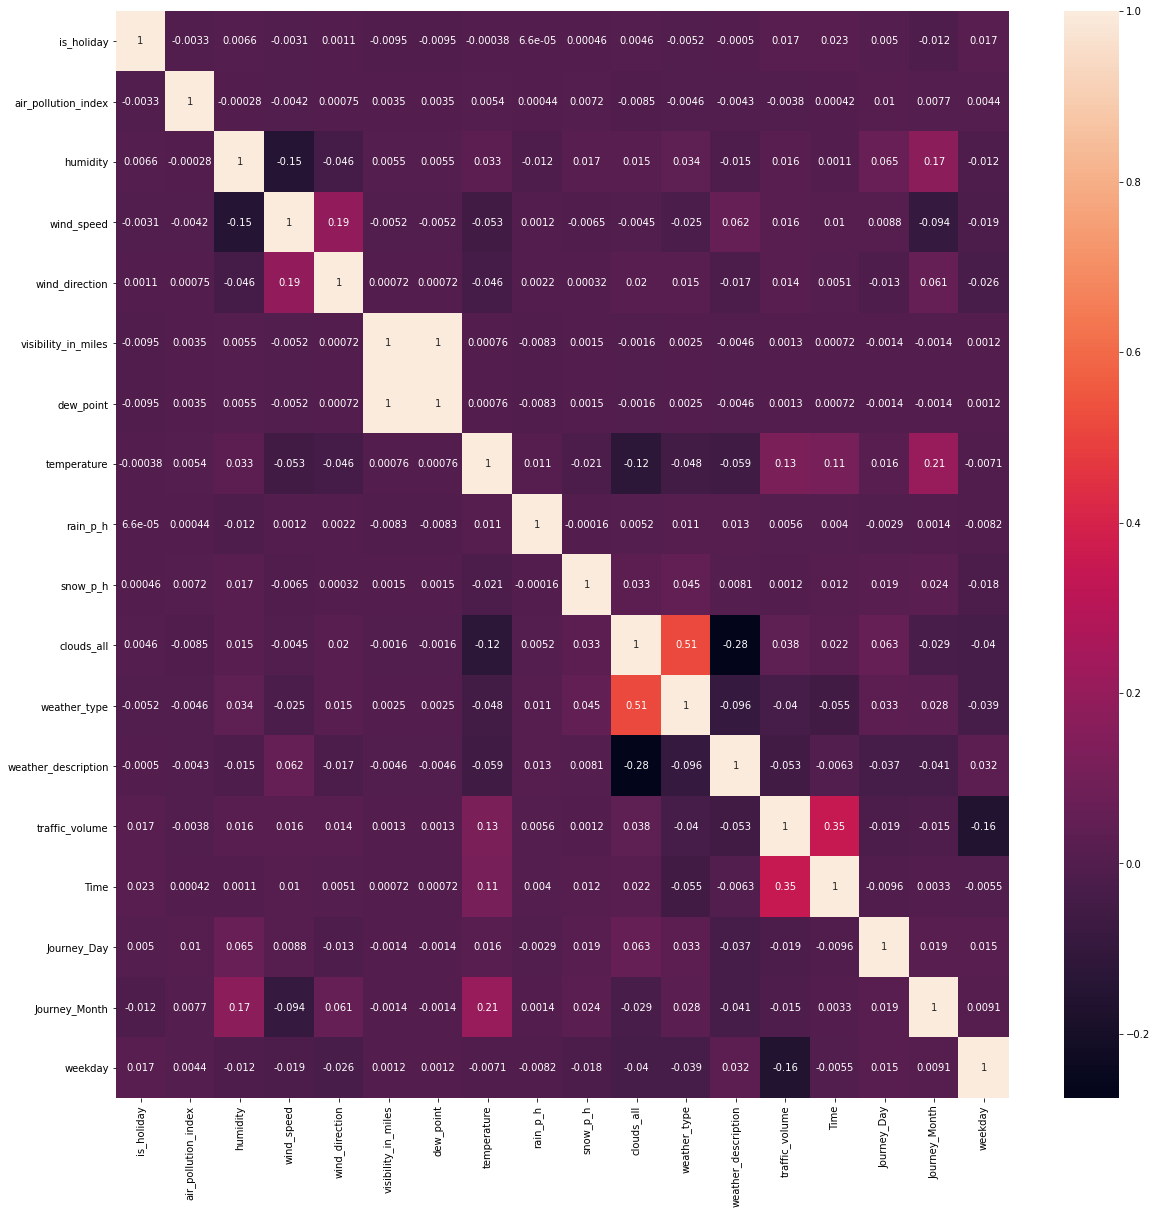

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True,ax=ax)

In [ ]:
X=df.drop(['air_pollution_index','humidity','wind_speed','wind_direction','snow_p_h','dew_point'],axis=1)
Y=df['traffic_volume']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(max_depth=5)

In [ ]:
parameters={'n_estimators':[1,5,10,50,100,200,400,500]}
grid_search=GridSearchCV(estimator=gbr,param_grid=parameters,cv=3)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
grid_search.score(x_train,y_train)

0.9999987124432088

In [ ]:
grid_search.best_params_

{'n_estimators': 500}

In [ ]:
gbr_best=GradientBoostingRegressor(max_depth=5,n_estimators=grid_search.best_params_['n_estimators'])

In [ ]:
gbr_best.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=gbr_best.predict(x_test)

In [ ]:
gbr_best.score(x_train,y_train)

0.9999986251906846

In [ ]:
print('R2 score is :', r2_score(y_test,y_pred))

R2 score is : 0.9999981131304697


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error is',mae )

mean absolute error is 2.005003758675221


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print('mean squared error is :',mse)

mean squared error is : 7.391112179307668


In [ ]:
msle=mean_squared_log_error(y_test,y_pred)
print('msle is:',msle)

msle is: 2.0817349823271466e-05


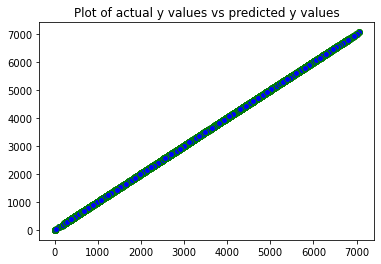

In [ ]:
plt.plot(y_test,y_pred,color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue')
plt.title('Plot of actual y values vs predicted y values')
plt.show()

In [ ]:
min_val_error=float("inf")
error_incr=0
for n_estimators in range(300,500):
  gbr.n_estimators=n_estimators
  gbr.fit(x_train,y_train)

  y_predi=gbr.predict(x_test)
  val_error=mean_squared_error(y_test,y_predi)
  print('No of estimator : ',n_estimators)
  print('Mean squared error:',val_error)

  if val_error<min_val_error:
    min_val_error=min_val_error
    error_incr=0
  else:
    error_incr+=1
    if error_incr>=10:
      break

No of estimator :  300
Mean squared error: 8.57792203468757
No of estimator :  301
Mean squared error: 8.617872736897134
No of estimator :  302
Mean squared error: 8.584541470442074
No of estimator :  303
Mean squared error: 8.590992409472038
No of estimator :  304
Mean squared error: 8.593050876553065
No of estimator :  305
Mean squared error: 8.583044742277458
No of estimator :  306
Mean squared error: 8.577039434881288
No of estimator :  307
Mean squared error: 8.496464818864371
No of estimator :  308
Mean squared error: 8.472422311943976
No of estimator :  309
Mean squared error: 8.629113327065452
No of estimator :  310
Mean squared error: 8.438572498026767
No of estimator :  311
Mean squared error: 8.516128881768447
No of estimator :  312
Mean squared error: 8.544310507947113
No of estimator :  313
Mean squared error: 8.498241975184818
No of estimator :  314
Mean squared error: 8.479336283655467
No of estimator :  315
Mean squared error: 8.483069929224882
No of estimator :  316
Me